In [ ]:
#@title Copyright 2020 Google LLC. Double-click for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Representation with a Feature Cross

In this exercise, you'll experiment with different ways to represent features.

## Learning Objectives:

After doing this Colab, you'll know how to:

  * Use [`tf.feature_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column) methods to represent features in different ways.
  * Represent features as [bins](https://developers.google.com/machine-learning/glossary/#bucketing). 
  * Cross bins to create a [feature cross](https://developers.google.com/machine-learning/glossary/#feature_cross). 

## The Dataset
  
Like several of the previous Colabs, this exercise uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Call the import statements

The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [1]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

2022-10-11 11:01:53.655140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-11 11:01:54.564088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-11 11:01:54.564134: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-11 11:01:54.701503: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-11 11:01:56.577607: W tensorflow/stream_executor/platform/de

Imported the modules.


## Load, scale, and shuffle the examples

The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set

The code cell then scales the `median_house_value` to a more human-friendly range and then shuffles the examples.

In [5]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

print(train_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6105      -118.2      34.1                34.0        609.0           149.0   
343       -116.9      34.0                30.0       3915.0           672.0   
188       -116.3      33.4                24.0       2746.0           514.0   
13324     -121.9      37.2                27.0       1265.0           216.0   
7260      -118.3      34.1                40.0       5485.0          1242.0   
...          ...       ...                 ...          ...             ...   
11341     -121.2      38.1                27.0       2400.0           435.0   
5379      -118.2      34.0                33.0       1201.0           340.0   
12350     -121.5      39.5                24.0       1028.0           185.0   
10331     -120.1      36.2                12.0       1923.0           559.0   
8024      -118.4      34.2                17.0       2049.0           548.0   

       population  households  median_income  media

## Represent latitude and longitude as floating-point values

Previous Colabs trained on only a single feature or a single synthetic feature. By contrast, this exercise trains on two features. Furthermore, this Colab introduces **feature columns**, which provide a sophisticated way to represent features.  

You create feature columns as follows:

  * Call a [`tf.feature_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column) method to represent a single feature, single feature cross, or single synthetic feature in the desired way.  For example, to represent a certain feature as floating-point values, call [`tf.feature_column.numeric_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column). To represent a certain feature as a series of buckets or bins, call [`tf.feature_column.bucketized_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column).
  * Assemble the created representations into a Python list. 

A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, `latitude` and `longitude` that identify each neighborhood's location. 

The following code cell calls [`tf.feature_column.numeric_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column) twice, first to represent `latitude` as floating-point value and a second time to represent `longitude` as floating-point values. 

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in `fp_feature_layer`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model. 


In [3]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

When used, the layer processes the raw inputs, according to the transformations described by the feature columns, and packs the result into a numeric array.  (The model will train on this numeric array.) 

## Define functions that create and train a model, and a plotting function

The following code defines three functions:

  * `create_model`, which tells TensorFlow to build a linear regression model and to use the `feature_layer_as_fp` as the representation of the model's features.
  * `train_model`, which will ultimately train the model from training set examples.
  * `plot_the_loss_curve`, which generates a loss curve.

In [4]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


## Train the model with floating-point representations

The following code cell calls the functions you just created to train, plot, and evaluate a model.

2022-10-11 11:11:37.028148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-11 11:11:37.028177: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-11 11:11:37.028212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kaon): /proc/driver/nvidia/version does not exist
2022-10-11 11:11:37.028896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/rossclark/Documents/msci_project/lib64/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: Us

Epoch 1/30
170/170 [==============================] - 1s 2ms/step - loss: 19383.8438 - root_mean_squared_error: 139.2259
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13537.6709 - root_mean_squared_error: 116.3515
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13489.2334 - root_mean_squared_error: 116.1432
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13429.6719 - root_mean_squared_error: 115.8865
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13392.8896 - root_mean_squared_error: 115.7277
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13350.7598 - root_mean_squared_error: 115.5455
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13296.8623 - root_mean_squared_error: 115.3120
Epoch 8/30
170/170 [==============================] - 0s 2ms/step - loss: 13266.5332 - root_mean_squared_error: 115.1804
Epoch 9/30
170/170 [============

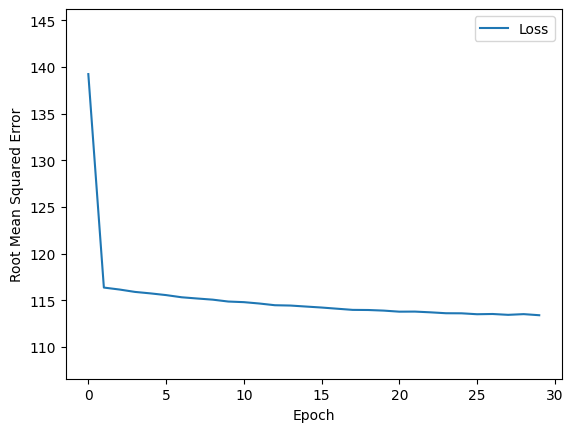


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 12182.8369 - root_mean_squared_error: 110.3759


[12182.8369140625, 110.37589263916016]

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 1: Why aren't floating-point values a good way to represent latitude and longitude?

Are floating-point values a good way to represent `latitude` and `longitude`? 

In [ ]:
#@title Double-click to view an answer to Task 1.

# No. Representing latitude and longitude as 
# floating-point values does not have much 
# predictive power. For example, neighborhoods at 
# latitude 35 are not 36/35 more valuable 
# (or 35/36 less valuable) than houses at 
# latitude 36.

# Representing `latitude` and `longitude` as 
# floating-point values provides almost no 
# predictive power. We're only using the raw values 
# to establish a baseline for future experiments 
# with better representations.

## Represent latitude and longitude in buckets

The following code cell represents latitude and longitude in buckets (bins). Each bin represents all the neighborhoods within a single degree. For example,
neighborhoods at latitude 35.4 and 35.8 are in the same bucket, but neighborhoods in latitude 35.4 and 36.2 are in different buckets. 

The model will learn a separate weight for each bucket. For example, the model will learn one weight for all the neighborhoods in the "35" bin, a different weight for neighborhoods in the "36" bin, and so on. This representation will create approximately 20 buckets:
 
  * 10 buckets for `latitude`. 
  * 10 buckets for `longitude`. 

In [7]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns)

## Train the model with bucket representations

Run the following code cell to train the model with bucket representations rather than floating-point representations:

Epoch 1/35
170/170 [==============================] - 1s 2ms/step - loss: 51999.5977 - root_mean_squared_error: 228.0342
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 44619.7070 - root_mean_squared_error: 211.2338
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 38041.7266 - root_mean_squared_error: 195.0429
Epoch 4/35
170/170 [==============================] - 0s 3ms/step - loss: 32240.5527 - root_mean_squared_error: 179.5565
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 27236.5176 - root_mean_squared_error: 165.0349
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 22985.1328 - root_mean_squared_error: 151.6085
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 19467.5977 - root_mean_squared_error: 139.5263
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 16673.3926 - root_mean_squared_error: 129.1255
Epoch 9/35
170/170 [============

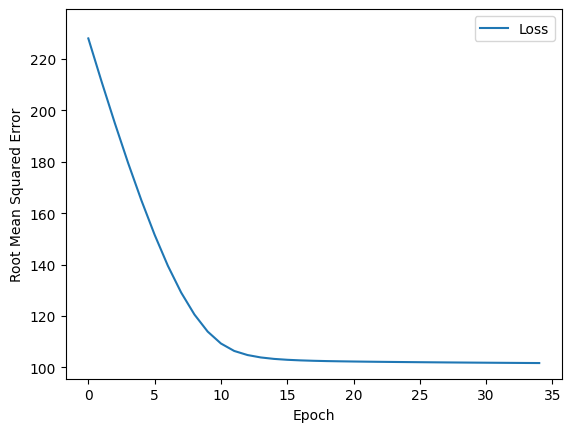


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 10197.8486 - root_mean_squared_error: 100.9844


[10197.8486328125, 100.9843978881836]

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 2: Did buckets outperform floating-point representations?

Compare the model's `root_mean_squared_error` values for the two representations (floating-point vs. buckets)?  Which model produced lower losses? 

In [ ]:
#@title Double-click for an answer to Task 2.

# Bucket representation outperformed 
# floating-point representations.  
# However, you can still do far better.

## Task 3: What is a better way to represent location?

Buckets are a big improvement over floating-point values. Can you identify an even better way to identify location with `latitude` and `longitude`?

In [ ]:
#@title Double-click to view an answer to Task 3.

# Representing location as a feature cross should 
# produce better results.

# In Task 2, you represented latitude in 
# one-dimensional buckets and longitude in 
# another series of one-dimensional buckets. 
# Real-world locations, however, exist in 
# two dimension. Therefore, you should
# represent location as a two-dimensional feature
# cross. That is, you'll cross the 10 or so latitude 
# buckets with the 10 or so longitude buckets to 
# create a grid of 100 cells. 

# The model will learn separate weights for each 
# of the cells.

## Represent location as a feature cross

The following code cell represents location as a feature cross. That is, the following code cell first creates buckets and then calls `tf.feature_column.crossed_column` to cross the buckets.



In [11]:
resolution_in_degrees = 0.4

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Invoke the following code cell to test your solution for Task 3. Please ignore the warning messages.

Epoch 1/35


/home/rossclark/Documents/msci_project/lib64/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


170/170 [==============================] - 1s 2ms/step - loss: 53663.3398 - root_mean_squared_error: 231.6535
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 48830.2812 - root_mean_squared_error: 220.9758
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 44302.7969 - root_mean_squared_error: 210.4823
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 40106.4531 - root_mean_squared_error: 200.2660
Epoch 5/35
170/170 [==============================] - 0s 3ms/step - loss: 36192.6680 - root_mean_squared_error: 190.2437
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 32601.6719 - root_mean_squared_error: 180.5593
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 29294.9355 - root_mean_squared_error: 171.1576
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 26314.8320 - root_mean_squared_error: 162.2185
Epoch 9/35
170/170 [=======================

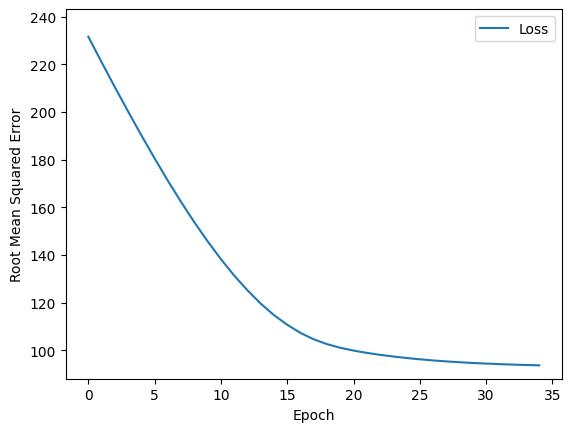


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 8643.4199 - root_mean_squared_error: 92.9700


[8643.419921875, 92.9699935913086]

In [12]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 4: Did the feature cross outperform buckets?

Compare the model's `root_mean_squared_error` values for the two representations (buckets vs. feature cross)?  Which model produced
lower losses? 

In [ ]:
#@title Double-click for an answer to this question.

# Yes, representing these features as a feature 
# cross produced much lower loss values than 
# representing these features as buckets

## Task 5: Adjust the resolution of the feature cross

Return to the code cell in the "Represent location as a feature cross" section. Notice that `resolution_in_degrees` is set to 1.0. Therefore, each cell represents an area of 1.0 degree of latitude by 1.0 degree of longitude, which corresponds to a cell of 110 km by 90 km.  This resolution defines a rather large neighborhood. 

Experiment with `resolution_in_degrees` to answer the following questions:

  1. What value of `resolution_in_degrees` produces the best results (lowest loss value)?
  2. Why does loss increase when the value of `resolution_in_degrees` drops below a certain value?

Finally, answer the following question:

  3. What feature (that does not exist in the California Housing Dataset) would
     be a better proxy for location than latitude X longitude.

In [ ]:
#@title Double-click for possible answers to Task 5.

#1. A resolution of ~0.4 degree provides the best 
#   results.

#2. Below ~0.4 degree, loss increases because the 
#   dataset does not contain enough examples in 
#   each cell to accurately predict prices for 
#   those cells.

#3. Postal code would be a far better feature 
#   than latitude X longitude, assuming that 
#   the dataset contained sufficient examples 
#   in each postal code.